<a href="https://colab.research.google.com/github/rromerov/Proyecto_Integrador/blob/DataSetExtender/Avance1/Avance1.12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Ricardo Ambrocio Ramírez Mendoza  – Profesor Tutor

#### **Miembros del equipo:**
- Ernesto Enríquez Rubio - A01228409
- Roberto Romero Vielma - A00822314
- Herbert Joadan Romero Villarreal –  A01794199



---


### Análisis exploratorio de datos
#### Background:

El cáncer representa una de las principales causas de muerte a nivel mundial, y su impacto se extiende a todas las regiones, incluyendo México. Según la Organización Mundial de la Salud (OMS), en 2020 se registraron aproximadamente 19.3 millones de nuevos casos de cáncer y 10 millones de muertes por esta enfermedad en todo el mundo [1]. En México, el cáncer es la tercera causa de muerte, con un estimado de 90,000 defunciones anuales [2].

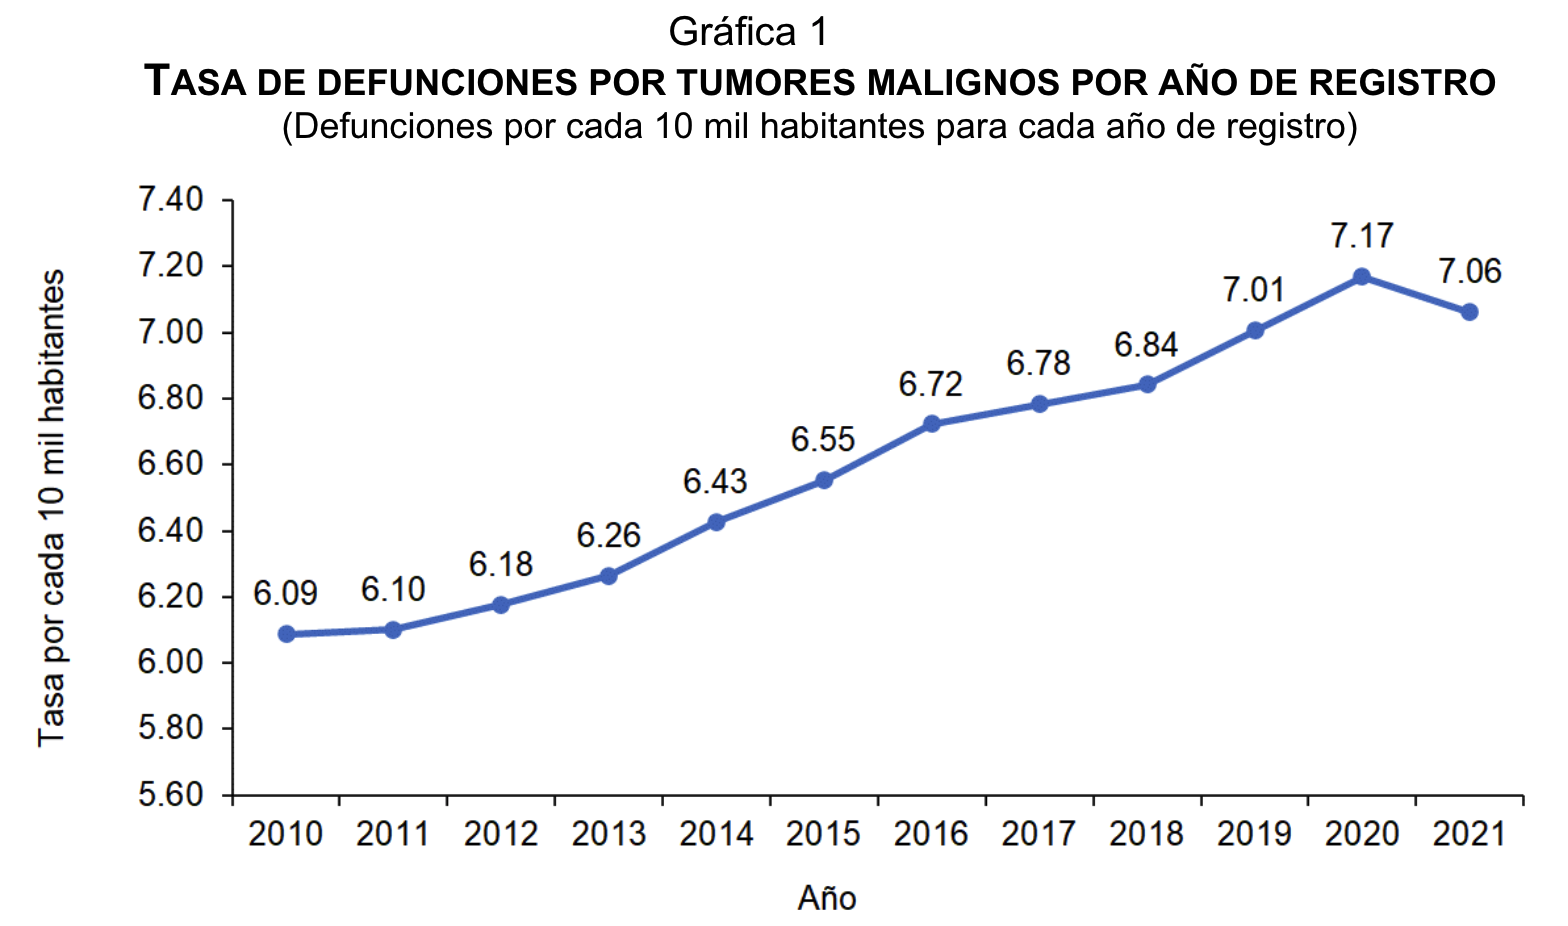

Ante esta problemática, la investigación científica se centra en desarrollar nuevos tratamientos y mejorar los existentes. Uno de los focos de atención es la proteína VEGF165 (Factor de Crecimiento Endotelial Vascular), la cual juega un papel crucial en la angiogénesis, el proceso de formación de nuevos vasos sanguíneos. En el contexto del cáncer, la sobreexpresión de VEGF165 promueve el crecimiento tumoral y la metástasis, haciendo de esta proteína un objetivo terapéutico atractivo.

El objetivo de este proyecto es desarrollar un modelo de IA capaz de identificar compuestos moleculares con alta eficiencia en la inhibición de VEGF165, lo que podría conducir al desarrollo de nuevos fármacos para el tratamiento del cáncer. Este Jupyter Notebook se centra en la fase inicial del proyecto: **Análisis Exploratorio de Datos (EDA)**.

En esta etapa, se analizarán datos de la base de datos CHEMBL, la cual contiene información sobre bioactividad de moléculas y sus posibles aplicaciones farmacológicas. El análisis exploratorio nos permitirá:

* Comprender la distribución de los datos: Identificar patrones, tendencias y valores atípicos en las variables relevantes para la inhibición de VEGF165.

* Descubrir relaciones entre las variables: Explorar posibles correlaciones entre las características del dataset.

* Identificar variables importantes: Seleccionar las variables más relevantes para el desarrollo del modelo de IA.

El análisis exploratorio de datos es fundamental para la construcción de un modelo de IA efectivo. Al comprender las características de los datos, podremos tomar decisiones informadas sobre las técnicas de preprocesamiento y modelado a aplicar en las etapas posteriores del proyecto.

Este proyecto tiene el potencial de contribuir significativamente a la lucha contra el cáncer, una enfermedad que afecta a millones de personas en todo el mundo, incluyendo México. El desarrollo de nuevos fármacos que inhiban la acción de VEGF165 podría mejorar la eficacia de los tratamientos y ofrecer nuevas esperanzas a los pacientes.



---



### EDA - Exploratory Data Analysis by code in Python

Comenzaremos con este Análisis a través de código python.

#### Instalar librerias faltantes

In [ ]:
# Acelerar procesamiento de pandas con GPU
%load_ext cudf.pandas

*Nota de ejecución:* **Ejecutable en Google Colab, requiere un entorno con GPU.**

In [1]:
# Instalación de rdkit
# Sin Output en consola
%%capture
! pip install chembl_webresource_client
! pip install --extra-index-url=https://pypi.nvidia.com cudf-cu12
! pip install rdkit


#### Importar librerias

In [2]:
# Importamos todas las librerías necesarias
import pandas as pd
from chembl_webresource_client.new_client import new_client
from google.colab import drive
import locale
import sys
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

Proteínas en la Farmacia: El caso de VEGF165

En el ámbito farmacéutico, las proteínas son moléculas esenciales con una amplia gama de funciones biológicas. Muchas proteínas actúan como dianas terapéuticas, lo que significa que los fármacos se diseñan para interactuar con ellas y modular su actividad, tratando así diversas enfermedades.

VEGF165 (Factor de Crecimiento Endotelial Vascular 165) es una proteína específica que juega un papel crucial en la angiogénesis, el proceso de formación de nuevos vasos sanguíneos. Esta proteína es esencial para el desarrollo normal del cuerpo, pero también puede ser secuestrada por enfermedades como el cáncer. En tumores, la sobreexpresión de VEGF165 puede llevar a una mayor vascularización, lo que facilita el crecimiento tumoral y la metástasis.

Debido a su rol en el desarrollo del cáncer, VEGF165 se ha convertido en una diana terapéutica importante. Los fármacos que inhiben la actividad de VEGF165 buscan bloquear la formación de nuevos vasos sanguíneos en el tumor, limitando su crecimiento y propagación.

*Algunos de los compuestos inhibidores de la proteina VEFG se listan a continuación:*

* Pazopanib: Es un inhibidor multiquinasa con biodisponibilidad oral. Actúa sobre los tres tipos de receptores del factor de crecimiento vascular endotelial (VEGFR-1, VEGFR-2 y VEGFR-3),
* Sunitinib: Actúa bloqueando los receptores del factor de crecimiento derivado de plaquetas (PDGFRα y PDGFRβ), los receptores VEGF (VEGFR1, VEGFR2 y VEGFR3), el receptor de factor de células madre (KIT), la tirosin-quinasa 3 tipo Fms (FLT3), el factor estimulador de colonias (CSF-1R) y el receptor del factor de crecimiento epidérmico (EGFR).
* Bevacizumab: Al unirse al VEGF, bevacizumab inhibe su unión a los receptores Flt-1 (VEGFR-1) y KDR (VEGFR-2) presentes en la superficie de las células endoteliales.
* Sorafenib:  Inhibe varios receptores de factores de crecimiento, como las kinasas de tirosina. Algunos de estos receptores incluyen:
PDGFR-beta,VEGFR-2 (receptor 2 del factor de crecimiento endotelial vascular), VEGFR-3
* Regorafenib:  Afecta a múltiples quinasas, incluyendo aquellas involucradas en la angiogénesis, mientras que el VEGF 165 desempeña un papel crítico en la promoción de la formación de vasos sanguíneos.
* Cabozantinib: cabozantinib actúa como un inhibidor de VEGF y MET, lo que lo convierte en una opción terapéutica para ciertos tipos de cáncer.
* Lenvatinib: Se dirige selectivamente a la actividad quinasa de varios receptores, incluyendo los del factor de crecimiento del endotelio vascular (VEGF): VEGFR1 (FLT1), VEGFR2 (KDR) y VEGFR3 (FLT4).



#### Dataset

ChEMBL es una base de datos de acceso abierto que alberga una vasta colección de información sobre moléculas bioactivas y sus actividades farmacológicas. Mantenida por el Instituto Europeo de Bioinformática (EMBL-EBI), ChEMBL ofrece datos curados sobre millones de compuestos, incluyendo sus estructuras químicas, propiedades, mecanismos de acción y resultados de ensayos biológicos.

En este proyecto, utilizaremos ChEMBL como fuente principal de datos para la construcción de un modelo de IA capaz de predecir la eficiencia de inhibición de VEGF165 por parte de diferentes compuestos. La riqueza de información de ChEMBL nos permitirá explorar las relaciones entre la estructura química de las moléculas y su actividad biológica, guiándonos en la búsqueda de nuevos candidatos a fármacos para el tratamiento del cáncer.

#### Definir medicamentos inhibidores de acuerdo a su ChEMBL ID



#### Inhibidores del receptor del factor de crecimiento endotelial vascular

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

# Display all columns
pd.set_option('display.max_columns', None)

# Crear cliente para targets
target_client = new_client.target

# Buscar objetivos que contengan "VEGF" en su nombre o descripción
targets = target_client.filter(target_synonym__icontains='VEGF')

# Obtener los IDs de los objetivos
target_ids = [target['target_chembl_id'] for target in targets]

# Crear cliente para bioactividad
activity_client = new_client.activity

# Lista para almacenar los DataFrames individuales
dataframes = []

for target_id in target_ids:
    try:
        # Obtener actividades (incluyendo IC50) para cada objetivo relacionado con "VEGF"
        activities = activity_client.filter(target_chembl_id=target_id, standard_type="IC50")

        if activities:
            # Convertir la respuesta en un DataFrame y agregar el ID del objetivo
            df_temp = pd.DataFrame.from_dict(activities)
            df_temp['target_chembl_id'] = target_id

            # Añadir el DataFrame a la lista
            dataframes.append(df_temp)

    except Exception as e:
        print(f'Error al procesar el objetivo {target_id}: {str(e)}')

In [78]:
# Concatenar todos los DataFrames en uno solo
if dataframes:
    df_search = pd.concat(dataframes, ignore_index=True)
    print(df_search)
else:
    print("No se encontraron resultados.")

      action_type activity_comment  activity_id activity_properties  \
0            None             None     14596999                  []   
1            None             None     14597000                  []   
2            None             None     14597001                  []   
3            None             None     14597002                  []   
4            None           219850     17608565                  []   
...           ...              ...          ...                 ...   
17787        None             None     20609622                  []   
17788        None             None     20609623                  []   
17789        None             None     20609624                  []   
17790        None             None     20609625                  []   
17791        None             None     20609626                  []   

      assay_chembl_id                                  assay_description  \
0       CHEMBL3243495  Inhibition of VEGF-A production in human HCT11..

In [79]:
df_search

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,14596999,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.47', 'le': '0.22', 'lle': '4.38', ...",CHEMBL2022564,APRATOXIN S4,CHEMBL2022564,9.49,0,http://www.openphacts.org/units/Nanomolar,2082776,=,1,1,=,None,IC50,nM,None,0.32,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.32
1,None,None,14597000,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.70', 'le': '0.23', 'lle': '4.65', ...",CHEMBL3234200,None,CHEMBL3234200,9.52,0,http://www.openphacts.org/units/Nanomolar,2082777,=,1,1,=,None,IC50,nM,None,0.3,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.3
2,None,None,14597001,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.08', 'le': '0.22', 'lle': '3.83', ...",CHEMBL3234201,None,CHEMBL3234201,9.33,0,http://www.openphacts.org/units/Nanomolar,2082778,=,1,1,=,None,IC50,nM,None,0.47,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.47
3,None,None,14597002,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.98', 'le': '0.23', 'lle': '4.81', ...",CHEMBL3234202,None,CHEMBL3234202,9.92,0,http://www.openphacts.org/units/Nanomolar,2082779,=,1,1,=,None,IC50,nM,None,0.12,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.12
4,None,219850,17608565,[],CHEMBL3705348,ELISA Assay: ELISA assay using VEGF.,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,None,None,CHEMBL3638958,None,2013.0,"{'bei': '13.98', 'le': '0.26', 'lle': '1.29', ...",CHEMBL3649592,None,CHEMBL3649592,4.56,0,http://www.openphacts.org/units/Nanomolar,2550287,=,37,1,=,None,IC50,nM,None,27400.0,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,27400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17787,None,None,20609622,[],CHEMBL4605825,Inhibition of TEL/KDR (unknown origin) transfe...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NCCCN(C)C)nc2...,None,None,CHEMBL4602715,ACS Med Chem Lett,2020.0,None,CHEMBL4636800,None,CHEMBL4636800,None,0,http://www.openphacts.org/units/Nanomolar,3467073,>,1,1,>,None,IC50,nM,None,7900.0,CHEMBL4630759,Homo sapiens,TEL/KDR,9606,None,None,IC50,uM,UO_0000065,None,7.9
17788,None,None,20609623,[],CHEMBL4605825,Inhibition of TEL/KDR (unknown origin) transfe...,B,None,None,BAO_0000190,BAO_00

In [80]:
len(df_search)

17792

#### Búsqueda proteina target: VEGF165

**Nota de ejecución: Ejecutable en Google Colab, requiere un entorno con GPU.**

La ejecución de la siguiente celda, toma entre 15 a 18 minutos, dependiendo de los recursos.

#### Seleción y filtrado de datos de bioactividad para la proteina VEGF165

In [81]:
records_df = len(df_search)
print(f'Number of records in the dataset: {records_df}')

Number of records in the dataset: 17792


### Descripción de columnas relevantes dentro del dataframe:

A continuación, se describe brevemente el contenido de cada columna del DataFrame, proveniente de la base de datos ChEMBL:

*Información de la Actividad Biológica:*

* **action_type**: Describe el tipo de acción del compuesto sobre la diana (ej: inhibidor, agonista).

* **activity_comment**: Comentarios adicionales sobre la actividad del compuesto.

* **activity_id**: Identificador único para cada registro de actividad.

* **activity_properties**: Información adicional sobre la actividad en formato JSON.

* **assay_chembl_id**: Identificador único del ensayo en el que se midió la actividad.

* **assay_description**: Descripción del ensayo biológico.

* **assay_type**: Tipo de ensayo (ej: binding, funcional).

* **assay_variant_accession**: Número de acceso a la variante de la proteína diana utilizada en el ensayo.

* **assay_variant_mutation**: Descripción de la mutación en la variante de la proteína diana.

* **bao_endpoint**: Punto final biológico medido en el ensayo.

* **bao_format**: Formato del valor de actividad medido.

* **bao_label**: Etiqueta del valor de actividad medido.

* **relation**: Relación entre el valor de actividad y el punto final biológico.

* **standard_flag**: Indica si el valor de actividad está estandarizado.

* **standard_relation**: Relación entre el valor de actividad estandarizado y el punto final biológico.

* **standard_text_value**: Valor de actividad estandarizado en formato texto.

* **standard_type**: Tipo de valor de actividad estandarizado.

* **standard_units**: Unidades del valor de actividad estandarizado.

* **standard_upper_value**: Límite superior del valor de actividad estandarizado.

* **standard_value**: Valor de actividad estandarizado. Es la potencia de la droga, mientras menor sea el valor más eficaz es, debido a que un mayor significa que se requiere de una mayor cantidad de droga para tener el mismo efecto.

* **text_value**: Valor de actividad en formato texto.

* **type**: Tipo de valor de actividad.

* **units**: Unidades del valor de actividad.

* **upper_value**: Límite superior del valor de actividad.

* **value**: Valor de actividad numérico.

*Información del Compuesto:*

* **canonical_smiles**: Representación SMILES canónica de la estructura del compuesto.

* **ligand_efficiency**: Eficiencia del ligando (compuesto) en su interacción con la diana.

* **molecule_chembl_id**: Identificador único del compuesto en ChEMBL.

* **molecule_pref_name**: Nombre preferido del compuesto en ChEMBL.
parent_molecule_chembl_id: Identificador único de la molécula parental del compuesto en ChEMBL.

*Información de la Diana:*

* **target_chembl_id**: Identificador único de la diana (proteína) en ChEMBL.

* **target_organism**: Organismo de origen de la diana.

* **target_pref_name**: Nombre preferido de la diana en ChEMBL.

* **target_tax_id**: Identificador taxonómico de la diana.

*Información Adicional:*

* **data_validity_comment**: Comentarios sobre la validez de los datos.

* **data_validity_description**: Descripción de la validez de los datos.

* **document_chembl_id**: Identificador único del documento (publicación) asociado a la actividad.

* **document_journal**: Nombre de la revista científica donde se publicó el documento.

* **document_year**: Año de publicación del documento.

* **pchembl_value**: Valor de -log10(IC50, EC50, Ki, Kd, o Potency), utilizado para comparar actividades.

* **potential_duplicate**: Indica si el registro es un posible duplicado.

* **qudt_units**: Unidades del valor de actividad según el sistema QUDT.

* **record_id**: Identificador único del registro en ChEMBL.

* **src_id**: Identificador de la fuente de datos original.

* **toid**: Identificador del objetivo (target) en otra base de datos.

* **uo_units**: Unidades del valor de actividad según el sistema UO.

In [82]:
# Verificar que solo se cuente con registros de IC50
df_search.standard_type.unique()

array(['IC50'], dtype=object)

In [83]:
# Visualizar rango de valores de standard value
df_search.standard_value.unique()

array(['0.32', '0.3', '0.47', ..., '98200.0', '20230.0', '74700.0'],
      dtype=object)

#### Salvar dataset original en Google Drive

In [84]:
# Cargar Google Drive al notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
locale.getpreferredencoding = lambda: "UTF-8"
# Crear carpeta dentro de google drive llamada data
! mkdir '/content/drive/My Drive/Colab Notebooks/data'

mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/data’: File exists


In [86]:
# Subir el csv a la carpeta destino
df_search.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv', index=False)

In [87]:
# Verificar que el archivo se encuentra en la carpeta destino
! ls -l '/content/drive/My Drive/Colab Notebooks/data'

total 61937
-rw------- 1 root root     4281 May 26 03:42 bioactivity_data_2class_pIC50.csv
-rw------- 1 root root   121664 May 21 01:19 bioactivity_data_2class_pIC50_pubchem_fp.csv
-rw------- 1 root root    51936 May 13 00:50 bioactivity_data_clean.csv
-rw------- 1 root root 11237569 May 26 04:31 bioactivity_data.csv
-rw------- 1 root root     2579 May 26 03:42 bioactivity_data_curated.csv
-rw------- 1 root root     2345 May 26 03:42 bioactivity_data_preprocessed.csv
-rw------- 1 root root   121567 May 21 01:19 descriptors_output.csv
-rw------- 1 root root      120 May 26 03:42 mannwhitneyu_LogP.csv
-rw------- 1 root root      118 May 26 03:42 mannwhitneyu_MW.csv
-rw------- 1 root root      130 May 26 03:42 mannwhitneyu_NumHAcceptors.csv
-rw------- 1 root root      126 May 26 03:42 mannwhitneyu_NumHDonors.csv
-rw------- 1 root root      120 May 26 03:42 mannwhitneyu_pIC50.csv
-rw------- 1 root root     5811 May 21 01:19 molecule.smi
-rw------- 1 root root      231 May 21 01:19 padel.sh

Ver contenido de **bioactivity_data.csv**

In [88]:
! head '/content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv'

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,14596999,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT116 cells after 12 hrs by alphaLISA assay,B,,,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(C)(C)C)C[C@@H](C)C[C@H](O)[C@H](C)C2=N[C@@H](CCC(=O)N[C@@H](Cc3ccc(OC)cc3)C(=O)N(C)[C@@H](C)C(=O)N1C)CS2

#### Manejo de valores faltantes
Dado que nos interesa conocer el standard value, los registros que no cuenten con esta información serán eliminados

In [89]:
df2 = df_search[df_search.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,14596999,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.47', 'le': '0.22', 'lle': '4.38', ...",CHEMBL2022564,APRATOXIN S4,CHEMBL2022564,9.49,0,http://www.openphacts.org/units/Nanomolar,2082776,=,1,1,=,None,IC50,nM,None,0.32,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.32
1,None,None,14597000,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.70', 'le': '0.23', 'lle': '4.65', ...",CHEMBL3234200,None,CHEMBL3234200,9.52,0,http://www.openphacts.org/units/Nanomolar,2082777,=,1,1,=,None,IC50,nM,None,0.3,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.3
2,None,None,14597001,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.08', 'le': '0.22', 'lle': '3.83', ...",CHEMBL3234201,None,CHEMBL3234201,9.33,0,http://www.openphacts.org/units/Nanomolar,2082778,=,1,1,=,None,IC50,nM,None,0.47,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.47
3,None,None,14597002,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.98', 'le': '0.23', 'lle': '4.81', ...",CHEMBL3234202,None,CHEMBL3234202,9.92,0,http://www.openphacts.org/units/Nanomolar,2082779,=,1,1,=,None,IC50,nM,None,0.12,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.12
4,None,219850,17608565,[],CHEMBL3705348,ELISA Assay: ELISA assay using VEGF.,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,None,None,CHEMBL3638958,None,2013.0,"{'bei': '13.98', 'le': '0.26', 'lle': '1.29', ...",CHEMBL3649592,None,CHEMBL3649592,4.56,0,http://www.openphacts.org/units/Nanomolar,2550287,=,37,1,=,None,IC50,nM,None,27400.0,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,27400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17787,None,None,20609622,[],CHEMBL4605825,Inhibition of TEL/KDR (unknown origin) transfe...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NCCCN(C)C)nc2...,None,None,CHEMBL4602715,ACS Med Chem Lett,2020.0,None,CHEMBL4636800,None,CHEMBL4636800,None,0,http://www.openphacts.org/units/Nanomolar,3467073,>,1,1,>,None,IC50,nM,None,7900.0,CHEMBL4630759,Homo sapiens,TEL/KDR,9606,None,None,IC50,uM,UO_0000065,None,7.9
17788,None,None,20609623,[],CHEMBL4605825,Inhibition of TEL/KDR (unknown origin) transfe...,B,None,None,BAO_0000190,BAO_00

In [90]:
records_df2 = len(df2)
preserved_info = round((records_df2/records_df)*100,2)
print(f'Number of records in df2 {records_df2}, percentage of information preserved: {preserved_info}')

Number of records in df2 16415, percentage of information preserved: 92.26


In [91]:
# Verificar la cantidad de registros de canonical smiles
canon_smiles_count = sum(df2.canonical_smiles.notnull())
canon_smiles_count

16415

In [92]:
# Verificar que la columna canonical_smiles cuente con valores unicos
unique_canon_smiles_count = len(df2.canonical_smiles.unique())
percentage_unique_canon_smiles = round(unique_canon_smiles_count/canon_smiles_count*100,2)
print(f'Number of unique canonical_smiles records in df2: {unique_canon_smiles_count}, percentage of unique records: {percentage_unique_canon_smiles}')

Number of unique canonical_smiles records in df2: 10635, percentage of unique records: 64.79


#### Eliminar canonical_smiles duplicadas

Una vez que notamos el porcentaje de entradas unicas, procedemos a eliminar los duplicados de la columna **canonical_smiles**

In [93]:
df2_unique_can_smiles = df2.drop_duplicates(['canonical_smiles'])
df2_unique_can_smiles

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,14596999,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.47', 'le': '0.22', 'lle': '4.38', ...",CHEMBL2022564,APRATOXIN S4,CHEMBL2022564,9.49,0,http://www.openphacts.org/units/Nanomolar,2082776,=,1,1,=,None,IC50,nM,None,0.32,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.32
1,None,None,14597000,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.70', 'le': '0.23', 'lle': '4.65', ...",CHEMBL3234200,None,CHEMBL3234200,9.52,0,http://www.openphacts.org/units/Nanomolar,2082777,=,1,1,=,None,IC50,nM,None,0.3,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.3
2,None,None,14597001,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.08', 'le': '0.22', 'lle': '3.83', ...",CHEMBL3234201,None,CHEMBL3234201,9.33,0,http://www.openphacts.org/units/Nanomolar,2082778,=,1,1,=,None,IC50,nM,None,0.47,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.47
3,None,None,14597002,[],CHEMBL3243495,Inhibition of VEGF-A production in human HCT11...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,None,None,CHEMBL3232820,J Med Chem,2014.0,"{'bei': '11.98', 'le': '0.23', 'lle': '4.81', ...",CHEMBL3234202,None,CHEMBL3234202,9.92,0,http://www.openphacts.org/units/Nanomolar,2082779,=,1,1,=,None,IC50,nM,None,0.12,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,0.12
4,None,219850,17608565,[],CHEMBL3705348,ELISA Assay: ELISA assay using VEGF.,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,None,None,CHEMBL3638958,None,2013.0,"{'bei': '13.98', 'le': '0.26', 'lle': '1.29', ...",CHEMBL3649592,None,CHEMBL3649592,4.56,0,http://www.openphacts.org/units/Nanomolar,2550287,=,37,1,=,None,IC50,nM,None,27400.0,CHEMBL1783,Homo sapiens,Vascular endothelial growth factor A,9606,None,None,IC50,nM,UO_0000065,None,27400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17787,None,None,20609622,[],CHEMBL4605825,Inhibition of TEL/KDR (unknown origin) transfe...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NCCCN(C)C)nc2...,None,None,CHEMBL4602715,ACS Med Chem Lett,2020.0,None,CHEMBL4636800,None,CHEMBL4636800,None,0,http://www.openphacts.org/units/Nanomolar,3467073,>,1,1,>,None,IC50,nM,None,7900.0,CHEMBL4630759,Homo sapiens,TEL/KDR,9606,None,None,IC50,uM,UO_0000065,None,7.9
17788,None,None,20609623,[],CHEMBL4605825,Inhibition of TEL/KDR (unknown origin) transfe...,B,None,None,BAO_0000190,BAO_00

#### Preprocesamiento de datos de bioactividad

##### Análisis de correlación cuantitativos y gráficos

Análisis de correlación de variables numéricas a través del método de **Pearson**

Para ello observamos el número de columnas que tenemos y notamos de qué tipo son cada una:

In [94]:
# Las siguientes columnas deben ser consideradas flotantes
df2_unique_can_smiles = df2_unique_can_smiles.astype({'pchembl_value': 'float64', 'standard_value': 'float64', 'value': 'float64'})

In [95]:
# Un breve conteo de Nulos
# Esto nos ayudará para la ingeniería de datos
null_counts = df2_unique_can_smiles.isnull().sum()
print(null_counts)

action_type                  10156
activity_comment              9103
activity_id                      0
activity_properties              0
assay_chembl_id                  0
assay_description                0
assay_type                       0
assay_variant_accession      10635
assay_variant_mutation       10635
bao_endpoint                     0
bao_format                       0
bao_label                        0
canonical_smiles                 0
data_validity_comment        10456
data_validity_description    10456
document_chembl_id               0
document_journal              2736
document_year                    2
ligand_efficiency             2296
molecule_chembl_id               0
molecule_pref_name           10412
parent_molecule_chembl_id        0
pchembl_value                 2103
potential_duplicate              0
qudt_units                       5
record_id                        0
relation                         5
src_id                           0
standard_flag       

In [96]:
# Desplegar el total de columnas del DF
columns_names = df2_unique_can_smiles.columns.values
columns_names

array(['action_type', 'activity_comment', 'activity_id',
       'activity_properties', 'assay_chembl_id', 'assay_description',
       'assay_type', 'assay_variant_accession', 'assay_variant_mutation',
       'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles',
       'data_validity_comment', 'data_validity_description',
       'document_chembl_id', 'document_journal', 'document_year',
       'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name',
       'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation',
       'src_id', 'standard_flag', 'standard_relation',
       'standard_text_value', 'standard_type', 'standard_units',
       'standard_upper_value', 'standard_value', 'target_chembl_id',
       'target_organism', 'target_pref_name', 'target_tax_id',
       'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value',
       'value'], dtype=object)

In [97]:
df2_unique_can_smiles.dtypes

action_type                   object
activity_comment              object
activity_id                    int64
activity_properties           object
assay_chembl_id               object
assay_description             object
assay_type                    object
assay_variant_accession       object
assay_variant_mutation        object
bao_endpoint                  object
bao_format                    object
bao_label                     object
canonical_smiles              object
data_validity_comment         object
data_validity_description     object
document_chembl_id            object
document_journal              object
document_year                float64
ligand_efficiency             object
molecule_chembl_id            object
molecule_pref_name            object
parent_molecule_chembl_id     object
pchembl_value                float64
potential_duplicate            int64
qudt_units                    object
record_id                      int64
relation                      object
s

In [98]:
# De las anteriores columnas, necesitamos aquellas numericas para la matriz de
# Correlacion, pero los Identificadores no aportan ningún tipo de relación
# Por ello los eliminaremos del DataFrame
correlation_matrix_columns = df2_unique_can_smiles.drop(columns=['activity_id','potential_duplicate','record_id','src_id','standard_flag'])

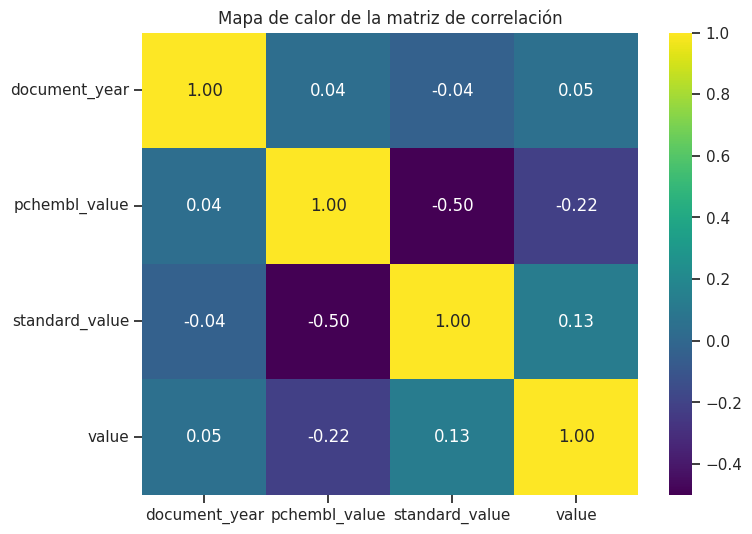

In [99]:
# Calcular la matriz de correlación
# Agregando parametro de que solo se aplique a valores numéricos
correlation_matrix = correlation_matrix_columns.corr(numeric_only=True, method='pearson')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Análisis de correlación de variables numéricas a través del método de **Spearman**

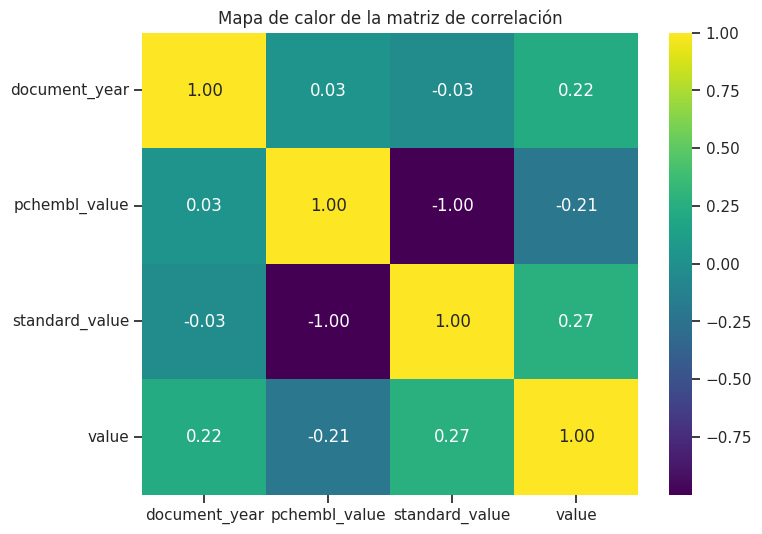

In [100]:
# Calcular la matriz de correlación
correlation_matrix = correlation_matrix_columns.corr(numeric_only=True, method='spearman')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Análisis de correlación de variables numéricas a través del método de **kendall**

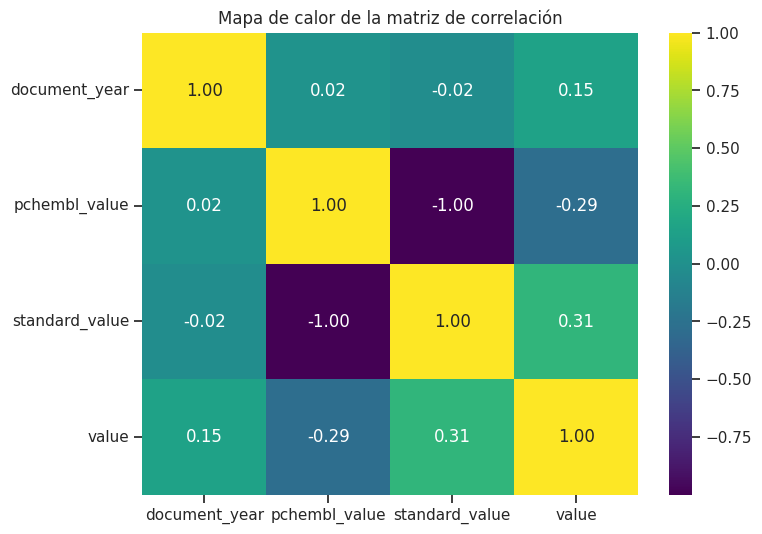

In [101]:
# Calcular la matriz de correlación
correlation_matrix = correlation_matrix_columns.corr(numeric_only=True, method='kendall')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

A modo de **conclusión**, podemos ver que las únicas columnas numéricas están asociadas a años, e identificadores. Estos datos no son de alta importancia para nuestro modelo de IA. La justificación y selección de columnas se detalla a continuación.

#### Combinar 3 columnas (molecule_chembl_id,canonical_smiles,standard_value) y bioactivity_class en un DataFrame

* **molecule_chembl_id**: Esta columna contiene identificadores únicos para las moléculas en el conjunto de datos. Es crucial si estás trabajando con un conjunto de datos que involucra múltiples moléculas y necesitas distinguirlas y realizar operaciones específicas basadas en su identificación.

* **canonical_smiles**: El SMILES canónico es una representación única y estandarizada de la estructura química de una molécula. Esta columna es importante cuando se realizan análisis químicos o comparacion de estructuras moleculares entre diferentes moléculas dentro del conjunto de datos.

* **standard_value**: Esta columna contiene valores numéricos que representan medidas estándar asociadas con las moléculas, como la actividad biológica de un compuesto (por ejemplo, la concentración inhibidora 50 (IC50) en ensayos biológicos). Es una columna crucial si estás interesado en analizar la actividad biológica de las moléculas o realizar comparaciones cuantitativas entre ellas.

Al seleccionar estas columnas específicas, estamos enfocando tu análisis en la identificación de las moléculas, sus estructuras químicas y las medidas estándar asociadas con su actividad biológica.

La Bioactividad será calculada/etiquetada en los siguientes pasos a través de un umbral.

In [102]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_unique_can_smiles[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.32
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.30
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.47
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.12
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,27400.00
...,...,...,...
17787,CHEMBL4636800,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NCCCN(C)C)nc2...,7900.00
17788,CHEMBL4644274,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NC4CC(C)(C)N(...,990.00
17789,CHEMBL4636056,CN1C(C)(C)CC(Nc2nc3c(-c4ccc(C(=O)N5C[C@@H]6C[C...,1300.00
17790,CHEMBL4643578,COC(=O)N1CCN(C(=O)c2ccc(-c3cnn4c(N)c(-c5ccccc5...,890.00


Guardar resultados en un archivo CSV

In [103]:
# Subir el csv a la carpeta destino
df3.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv', index=False)

In [104]:
# Verificar cambios
! ls '/content/drive/My Drive/Colab Notebooks/data/'

bioactivity_data_2class_pIC50.csv	      molecule.smi
bioactivity_data_2class_pIC50_pubchem_fp.csv  padel.sh
bioactivity_data_clean.csv		      padel.zip
bioactivity_data.csv			      plot_bioactivity_class.pdf
bioactivity_data_curated.csv		      plot_ic50.pdf
bioactivity_data_preprocessed.csv	      plot_LogP.pdf
descriptors_output.csv			      plot_MW.pdf
mannwhitneyu_LogP.csv			      plot_MW_vs_LogP.pdf
mannwhitneyu_MW.csv			      plot_NumHAcceptors.pdf
mannwhitneyu_NumHAcceptors.csv		      plot_NumHDonors.pdf
mannwhitneyu_NumHDonors.csv		      results.zip
mannwhitneyu_pIC50.csv


### Etiquetado de componentes
Los datos de bioactividad estan en la unidad IC50. Compuestos con menos de 1000 nM será considerados como **activos** mientras aquellos que sean mayores a 10,000 nM serán considerados como **inactivos**. Todos los valores que caen dentro de 1,000 y 10,000 nM serán clasificados como **intermedios**.

In [105]:
# Leer csv con datos preprocesados
df4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv')

In [106]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [107]:
# Concatenar lista generada como una serie de pandas y agregarla al df
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.32,active
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.30,active
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.47,active
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.12,active
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,27400.00,inactive
...,...,...,...,...
10630,CHEMBL4636800,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NCCCN(C)C)nc2...,7900.00,intermediate
10631,CHEMBL4644274,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NC4CC(C)(C)N(...,990.00,active
10632,CHEMBL4636056,CN1C(C)(C)CC(Nc2nc3c(-c4ccc(C(=O)N5C[C@@H]6C[C...,1300.00,intermediate
10633,CHEMBL4643578,COC(=O)N1CCN(C(=O)c2ccc(-c3cnn4c(N)c(-c5ccccc5...,890.00,active


Guardad dataframe como archivo csv

In [108]:
# Subir el csv a la carpeta destino
df5.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv', index=False)

#### Cargar datos de bioactividad

In [109]:
# Leer el archivo con los datos curados
df6 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv')
df6

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.32,active
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.30,active
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.47,active
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.12,active
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,27400.00,inactive
...,...,...,...,...
10630,CHEMBL4636800,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NCCCN(C)C)nc2...,7900.00,intermediate
10631,CHEMBL4644274,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NC4CC(C)(C)N(...,990.00,active
10632,CHEMBL4636056,CN1C(C)(C)CC(Nc2nc3c(-c4ccc(C(=O)N5C[C@@H]6C[C...,1300.00,intermediate
10633,CHEMBL4643578,COC(=O)N1CCN(C(=O)c2ccc(-c3cnn4c(N)c(-c5ccccc5...,890.00,active


#### Calcular descriptores Lipinski

#### Regla de Lipinski


La regla de Lipinski establece los siguientes criterios para evaluar la idoneidad de una molécula como candidato a fármaco:

1. **Peso molecular (MW):** MW < 500
2. **LogP (coeficiente de partición octanol-agua):** LogP < 5
3. **Número de donantes de hidrógeno (HBD):** HBD < 5
4. **Número de aceptores de hidrógeno (HBA):** HBA < 10



In [110]:
def lipinski(smiles, verbose=False):

  moldata = []
  for element in smiles:
    mol = Chem.MolFromSmiles(element)
    moldata.append(mol)

  baseData = np.arange(1,1)
  i = 0
  for mol in moldata:

    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumAcceptors])

    if i==0:
      baseData = row
    else:
      baseData = np.vstack([baseData, row])
    i = i+1

  columNames = ['MW','LogP','NumHDonors','NumHAcceptors']
  descriptors = pd.DataFrame(data=baseData, columns = columNames)

  return descriptors

In [111]:
df_lipinski = lipinski(df6.canonical_smiles)

#### Combinar DataFrames

In [112]:
# Visualizar el dataframe con los descriptores calculados
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,828.130,5.1124,2.0,10.0
1,814.103,4.8664,2.0,10.0
2,842.157,5.5025,2.0,10.0
3,828.130,5.1124,2.0,10.0
4,326.440,3.2705,2.0,4.0
...,...,...,...,...
10630,446.555,4.0263,2.0,8.0
10631,514.674,5.7260,2.0,8.0
10632,579.749,5.3221,2.0,8.0
10633,624.790,5.2330,2.0,9.0


In [113]:
combined_df = pd.concat([df6, df_lipinski], axis=1)
combined_df

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.32,active,828.130,5.1124,2.0,10.0
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.30,active,814.103,4.8664,2.0,10.0
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.47,active,842.157,5.5025,2.0,10.0
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.12,active,828.130,5.1124,2.0,10.0
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,27400.00,inactive,326.440,3.2705,2.0,4.0
...,...,...,...,...,...,...,...,...
10630,CHEMBL4636800,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NCCCN(C)C)nc2...,7900.00,intermediate,446.555,4.0263,2.0,8.0
10631,CHEMBL4644274,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NC4CC(C)(C)N(...,990.00,active,514.674,5.7260,2.0,8.0
10632,CHEMBL4636056,CN1C(C)(C)CC(Nc2nc3c(-c4ccc(C(=O)N5C[C@@H]6C[C...,1300.00,intermediate,579.749,5.3221,2.0,8.0
10633,CHEMBL4643578,COC(=O)N1CCN(C(=O)c2ccc(-c3cnn4c(N)c(-c5ccccc5...,890.00,active,624.790,5.2330,2.0,9.0


#### Convertir IC50 a pIC50

Para contar con datos más uniformes, se convirtió **IC50** a su escala logaritmica negativa, lo cual esencialemnte es ${-\log_{10}(IC_{50})}$

Se definió una función **pIC50** la cual aceptará un dataframe como entrada y hará lo siguiente:

* Tomar los valores de IC50 de la columna **standard_value** y los convertirá de nM a M mediante la multiplicación del valor por ${10^{-9}}$.
* Tomar el valor molar y aplicar ${-\log_{10}}$
* Borrar la columna de **standard_value** y crear una nueva columna llamada **pIC50**.

In [114]:
def pIC50(input):
  pIC50 = []
  for i in input['standard_value_norm']:
    molar = i*(10**-9) # Convierte nM a M
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop(columns='standard_value_norm')

  return x

Los valores mayores a 100,000,000 se quedarán en 100,000,000, de no hacerlo así los valores logaritmicos negativos se convertirán en negativos.

In [115]:
combined_df.standard_value.describe()

count    1.063500e+04
mean     1.127840e+04
std      6.718791e+04
min      2.300000e-02
25%      4.000000e+01
50%      3.700000e+02
75%      4.200500e+03
max      4.081000e+06
Name: standard_value, dtype: float64

En este caso no es necesario pero se debe implementar esa lógica para evitar cualquier tipo de problema en el futuro.

In [116]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns='standard_value')

    return x

Primero aplicaremos la función **norm_value** para que los valores dentro de la columna **standard_value** sean normalizados.

In [117]:
df_norm = norm_value(combined_df)

El siguiente paso es convertir la columna IC50 a pIC50

In [118]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,828.130,5.1124,2.0,10.0,9.494850
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,814.103,4.8664,2.0,10.0,9.522879
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,842.157,5.5025,2.0,10.0,9.327902
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,828.130,5.1124,2.0,10.0,9.920819
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,inactive,326.440,3.2705,2.0,4.0,4.562249
...,...,...,...,...,...,...,...,...
10630,CHEMBL4636800,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NCCCN(C)C)nc2...,intermediate,446.555,4.0263,2.0,8.0,5.102373
10631,CHEMBL4644274,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NC4CC(C)(C)N(...,active,514.674,5.7260,2.0,8.0,6.004365
10632,CHEMBL4636056,CN1C(C)(C)CC(Nc2nc3c(-c4ccc(C(=O)N5C[C@@H]6C[C...,intermediate,579.749,5.3221,2.0,8.0,5.886057
10633,CHEMBL4643578,COC(=O)N1CCN(C(=O)c2ccc(-c3cnn4c(N)c(-c5ccccc5...,active,624.790,5.2330,2.0,9.0,6.050610


In [119]:
df_final.pIC50.describe()

count    10635.000000
mean         6.426244
std          1.278506
min          2.389233
25%          5.376699
50%          6.431798
75%          7.397940
max         10.638272
Name: pIC50, dtype: float64

#### Eliminar la clase bioactiva intermedia

Cuando eliminamos una clase bioactiva intermedia durante el análisis de datos del CHEMBL para la proteína VEGF165, estamos simplificando el análisis, enfoncanonos en resultados relevantes, optimizamos recursos y mejoramos la precisión de los resultados obtenidos.

In [120]:
df_2classes = df_final[df_final['class'] != 'intermediate']
df_2classes

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,828.130,5.11240,2.0,10.0,9.494850
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,814.103,4.86640,2.0,10.0,9.522879
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,842.157,5.50250,2.0,10.0,9.327902
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,828.130,5.11240,2.0,10.0,9.920819
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,inactive,326.440,3.27050,2.0,4.0,4.562249
...,...,...,...,...,...,...,...,...
10624,CHEMBL2332843,Cc1cccc(NC(=O)Nc2ccc(Nc3ncnc4[nH]ncc34)cc2)c1C,inactive,373.420,4.35734,4.0,5.0,4.000000
10625,CHEMBL2332842,O=C(Nc1ccc(Br)cc1)Nc1ccc(Nc2ncnc3[nH]ncc23)cc1,inactive,424.262,4.50300,4.0,5.0,4.000000
10626,CHEMBL2332841,COc1cccc(NC(=O)Nc2ccc(Nc3ncnc4[nH]ncc34)cc2)c1,inactive,375.392,3.74910,4.0,6.0,4.000000
10631,CHEMBL4644274,COc1ccc(-c2cnn3c(N)c(-c4ccccc4)c(NC4CC(C)(C)N(...,active,514.674,5.72600,2.0,8.0,6.004365


### **Descripción de columnas de Dataset Final**

**Molecule ChEMBL ID:** (Categórica) Identificador único asignado a cada molécula en la base de datos ChEMBL. Proporciona un identificador único para referenciar la molécula en la base de datos.

**Canonical SMILES:** (Categórica) Una representación simplificada de la estructura química de la molécula en forma de cadena de texto. Permite la comparación y el análisis de la estructura química de la molécula.

**Class:** (Categórica) Esta columna puede indicar alguna clasificación o categorización específica de la molécula.


*   Un compuesto se clasifica como "active" cuando demuestra una interacción notable con el objetivo biológico de interés y produce un efecto biológico deseado, como la inhibición de una enzima o la modulación de una vía biológica.
La actividad biológica puede ser medida en términos de su capacidad para modificar la función de un objetivo biológico, como un receptor o una enzima, y se cuantifica mediante parámetros como la concentración inhibitoria media (IC50), la constante de inhibición (Ki), entre otros.
*   Un compuesto se clasifica como "inactive" cuando no interactúa de manera sustancial con el objetivo biológico de interés o cuando su interacción no produce un efecto biológico observable o relevante.



**Molecular Weight (MW):** (Numérica) El peso molecular del compuesto, que es la masa total de todas las partículas en una molécula dada. Se expresa en unidades de masa atómica (u).

**LogP:** (Numérica) El coeficiente de partición octanol-agua (LogP) es una medida de la lipofilicidad de una molécula, lo que indica su afinidad por los solventes orgánicos (octanol) en comparación con los solventes acuosos (agua).

**NumHDonors:** (Numérica) El número de donadores de hidrógeno en la molécula, que son átomos de hidrógeno unidos a un átomo electronegativo (como oxígeno o nitrógeno) y que pueden actuar como donadores de protones en enlaces de hidrógeno.

**NumHAcceptors:** (Numérica) El número de aceptores de hidrógeno en la molécula, que son átomos electronegativos (como oxígeno o nitrógeno) capaces de aceptar pares de electrones adicionales y formar enlaces de hidrógeno.

**pIC50:** (Numérica) Es el valor negativo del logaritmo en base 10 de la concentración inhibitoria media (IC50) de un compuesto, expresado en mol / L. Es comúnmente utilizado en la actividad de inhibición de fármacos, donde valores más altos de pIC50 indican una mayor actividad inhibitoria.

In [121]:
# Guardar dataframe en archivo csv
df_final.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50.csv', index=False)

### EDA - Exploratory Data Analysis (Análisis del Espacio Químico) mediante descriptores Lipinski

#### Distribución de las dos clases de bioactividad

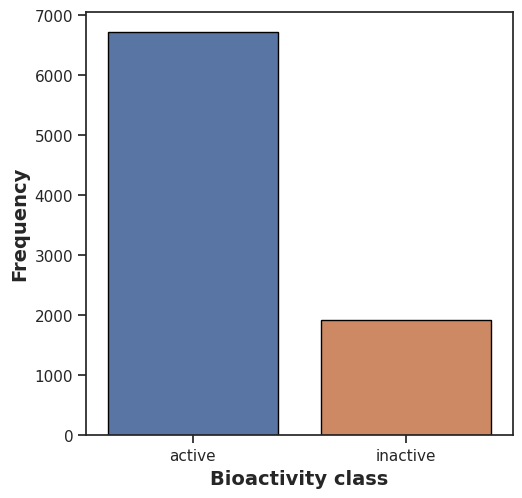

In [122]:
sns.set(style='ticks')
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2classes, edgecolor='black', hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_bioactivity_class.pdf')

#### Gráfica de dispersión

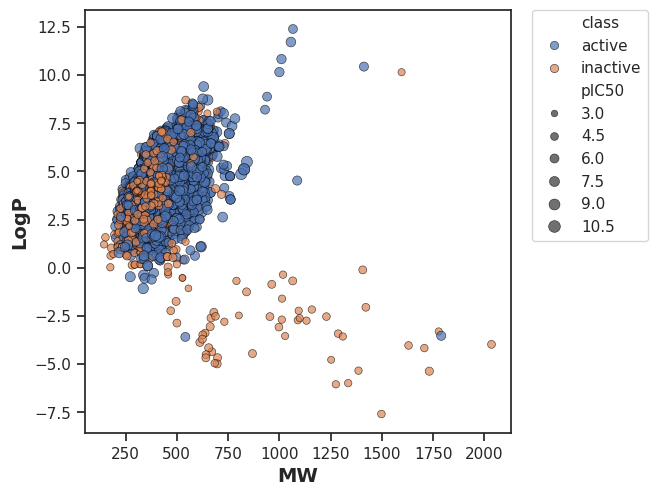

In [123]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2classes, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_MW_vs_LogP.pdf')

#### Diagrama de caja
##### Valor de pIC50

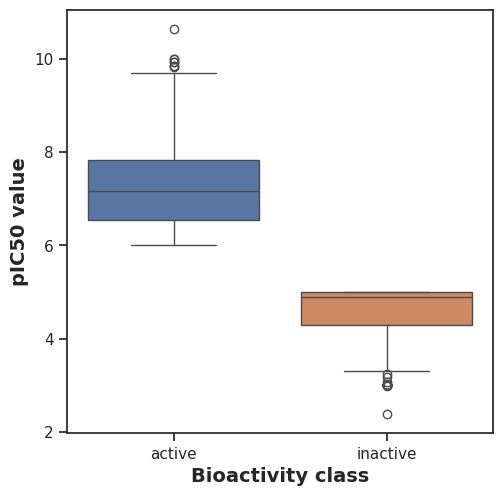

In [124]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_ic50.pdf')

#### Análisis estadístico
**Prueba U Mann-Whitney**


In [125]:
def mannwhitney(descriptor, verbose=False):

  # Generador de semilla aleatoria
    seed(1)

  # Activos e inactivos
    selection = [descriptor, 'class']
    df = df_2classes[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df = df_2classes[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]

  # Comparar muestras
    stat, p = mannwhitneyu(active, inactive)

  # Interpretar
    alpha = 0.05
    if p > alpha:
      interpretation = 'Same distribution (fail to reject H0)'
    else:
      interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor,
                            'Statistics':stat,
                            'p':p,
                            'alpha':alpha,
                            'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(f'/content/drive/My Drive/Colab Notebooks/data/{filename}')

    return results

In [126]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,12960016.0,0.0,0.05,Different distribution (reject H0)


#### MW

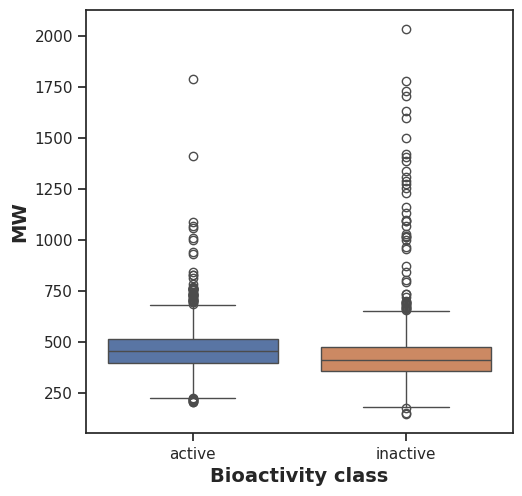

In [127]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_MW.pdf')

In [128]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,8140823.5,3.616496e-66,0.05,Different distribution (reject H0)


#### LogP

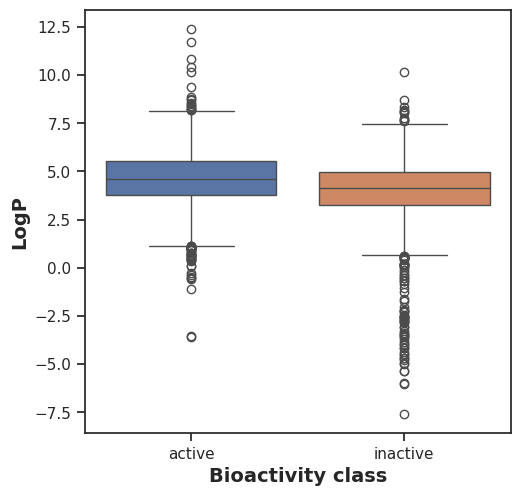

In [129]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_LogP.pdf')

In [130]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,7880192.5,1.491712e-47,0.05,Different distribution (reject H0)


#### NumHDonors

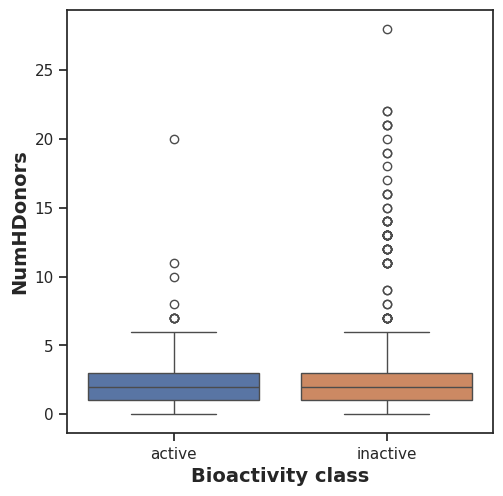

In [131]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2classes, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_NumHDonors.pdf')

In [132]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,7772645.0,6.977592e-44,0.05,Different distribution (reject H0)


#### NumHAcceptors

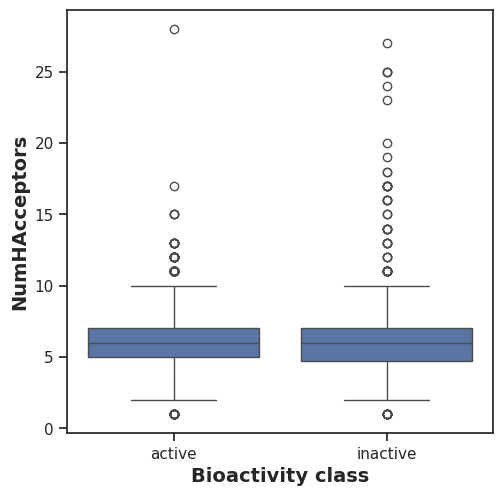

In [133]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2classes)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_NumHAcceptors.pdf')

In [134]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,6781159.0,0.001592,0.05,Different distribution (reject H0)


#### Guardar en un archivo comprimido los archivos generados

In [135]:
# Guardar archivos en un archivo zip
!zip -r /content/drive/My\ Drive/Colab\ Notebooks/data/results.zip /content/drive/My\ Drive/Colab\ Notebooks/data/*.pdf /content/drive/My\ Drive/Colab\ Notebooks/data/*.csv

updating: content/drive/My Drive/Colab Notebooks/data/plot_bioactivity_class.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_ic50.pdf (deflated 37%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_LogP.pdf (deflated 37%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_MW.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_MW_vs_LogP.pdf (deflated 1%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_NumHAcceptors.pdf (deflated 39%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_NumHDonors.pdf (deflated 39%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50.csv (deflated 79%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv (deflated 92%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv (deflated 83%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv (deflated

In [136]:
# Verificar cambios
! ls '/content/drive/My Drive/Colab Notebooks/data/'

bioactivity_data_2class_pIC50.csv	      molecule.smi
bioactivity_data_2class_pIC50_pubchem_fp.csv  padel.sh
bioactivity_data_clean.csv		      padel.zip
bioactivity_data.csv			      plot_bioactivity_class.pdf
bioactivity_data_curated.csv		      plot_ic50.pdf
bioactivity_data_preprocessed.csv	      plot_LogP.pdf
descriptors_output.csv			      plot_MW.pdf
mannwhitneyu_LogP.csv			      plot_MW_vs_LogP.pdf
mannwhitneyu_MW.csv			      plot_NumHAcceptors.pdf
mannwhitneyu_NumHAcceptors.csv		      plot_NumHDonors.pdf
mannwhitneyu_NumHDonors.csv		      results.zip
mannwhitneyu_pIC50.csv


## Conclusion de EDA - Exploratory Data Analysis

En este estudio de exploración de datos (EDA) sobre la bioactividad de moléculas asociadas a la inhibición de la proteína VEGF165, se ha realizado un análisis exhaustivo de los datos recopilados de CHEMBL. Nuestro objetivo principal fue comprender la relación entre la estructura química de las moléculas y su actividad biológica, específicamente su capacidad para inhibir la proteína VEGF165.

Durante el proceso de EDA, se llevaron a cabo diversas etapas, incluyendo la conversión de datos, el análisis estadístico descriptivo, la visualización de distribuciones y relaciones, y la identificación de tendencias y patrones significativos. A través de estas técnicas, se pudieron obtener insights valiosos que contribuyen a nuestra comprensión de la bioactividad de estas moléculas.

Entre los hallazgos más destacados se encuentra la identificación de características estructurales comunes entre las moléculas con alta actividad inhibitoria de VEGF165, lo cual sugiere posibles áreas de enfoque para el diseño de moléculas más efectivas en futuras investigaciones. Además, se observaron correlaciones interesantes entre ciertos descriptores químicos y la actividad biológica, lo que podría orientar estrategias de optimización de moléculas.

En conclusión, este análisis exploratorio proporciona una base sólida para proceder a realizar un proceso de Ingeniería de datos, destacando la importancia del análisis de datos en la comprensión de la actividad biológica de moléculas y su potencial impacto en el desarrollo de tratamientos farmacológicos más efectivos.

## Referencias

1. World Health Organization. (2022). Cancer. https://www.who.int/news-room/fact-sheets/detail/cancer

2.  Instituto Nacional de Estadística y Geografía (INEGI). (2023). Estadísticas a propósito del Día Mundial contra el Cáncer (4 de febrero). https://www.inegi.org.mx/contenidos/saladeprensa/aproposito/2023/EAP_Cancer.pdf

3. Ton, Chi Minh Hoan, y Ahmad Namjou. "Bioinformatics Project from Scratch - Drug Discovery Part 1 (Data Collection and Pre-Processing)". YouTube, 4 de mayo de 2020, https://www.youtube.com/watch?v=icf489K1hWc

4. Ton, Chi Minh Hoan, y Ahmad Namjou. "Bioinformatics Project from Scratch - Drug Discovery Part 2 (Data Collection and Pre-Processing)". YouTube, 4 de mayo de 2020, https://www.youtube.com/watch?v=qWVTxfLq2ak

5. Ton, Chi Minh Hoan, y Ahmad Namjou. "Bioinformatics Project from Scratch - Drug Discovery Part 3 (Data Collection and Pre-Processing)". YouTube, 4 de mayo de 2020, https://www.youtube.com/watch?v=zD2focOkQ48


